In [1]:
!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
# Importing libraries and loading the dataset
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
# Inspecting the shape of the dataset
print("X_train shape:", X_train.shape)   # (50000, 32, 32, 3)
print("X_test shape:",  X_test.shape)    # (10000, 32, 32, 3)
print("y_train shape:", y_train.shape)   # (50000, 1)
print("y_test shape:",  y_test.shape)    # (10000, 1)
# Inspecting data types
print("X dtype:", X_train.dtype)
print("y dtype:", y_train.dtype)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
X dtype: uint8
y dtype: uint8


In [4]:
# Inspecting classes distribution
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
# Unique label values
print("Unique labels:", np.unique(y_train))
# Flatten y to 1D for convenience
y_train_flat = y_train.ravel()
y_test_flat  = y_test.ravel()

import collections
train_counts = collections.Counter(y_train_flat)
test_counts  = collections.Counter(y_test_flat)
print("Train counts per class:")
for i, name in enumerate(class_names):
    print(f"{i} - {name:10s}: {train_counts[i]}")
print("\nTest counts per class:")
for i, name in enumerate(class_names):
    print(f"{i} - {name:10s}: {test_counts[i]}")

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Train counts per class:
0 - airplane  : 5000
1 - automobile: 5000
2 - bird      : 5000
3 - cat       : 5000
4 - deer      : 5000
5 - dog       : 5000
6 - frog      : 5000
7 - horse     : 5000
8 - ship      : 5000
9 - truck     : 5000

Test counts per class:
0 - airplane  : 1000
1 - automobile: 1000
2 - bird      : 1000
3 - cat       : 1000
4 - deer      : 1000
5 - dog       : 1000
6 - frog      : 1000
7 - horse     : 1000
8 - ship      : 1000
9 - truck     : 1000


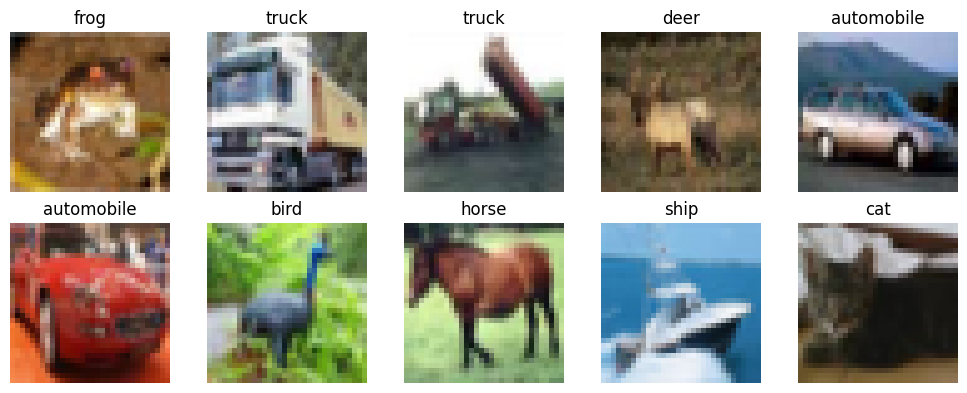

In [5]:
# A few sample images with labels
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train_flat[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

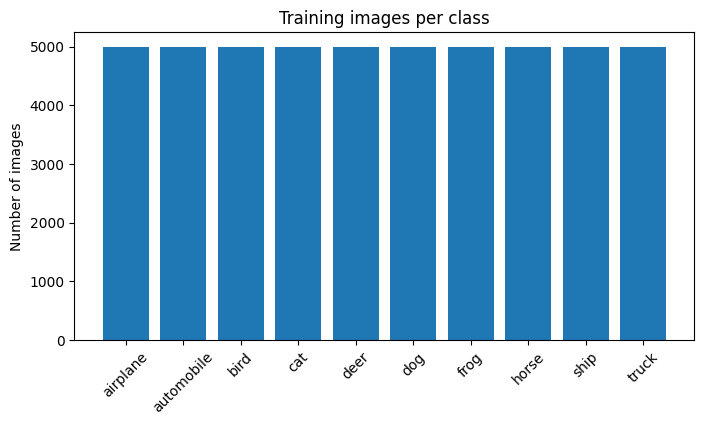

In [6]:
# Bar plot of images per class
plt.figure(figsize=(8,4))
counts = [train_counts[i] for i in range(10)]
plt.bar(class_names, counts)
plt.xticks(rotation=45)
plt.ylabel("Number of images")
plt.title("Training images per class")
plt.show()

In [7]:
# Checking for obvious data issues
print("Any NaNs in X_train?", np.isnan(X_train).any())
print("Any NaNs in X_test?",  np.isnan(X_test).any())
print("Any NaNs in y_train?", np.isnan(y_train).any())
print("Any NaNs in y_test?",  np.isnan(y_test).any())

Any NaNs in X_train? False
Any NaNs in X_test? False
Any NaNs in y_train? False
Any NaNs in y_test? False


We explored the dataset. This is a keras dataset cifar, consisting of 60,000 images and its classifications labels (0-9). These are 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. The dataset is split to training data consisting of 50,000 images and to testing data containing of 10,000 images. Images are RGB images of 32x32 pixels. The classes in the dataset are perfectly distributed, with 5,000 images per each class.

In [8]:
# Step 3: Preprocess the data
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Normalization complete!")

Normalization complete!


In [9]:
# Building the initial model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu',
           input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    # Dropout(0.2),  # optional

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    # Dropout(0.2),  # optional

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Print model summary to verify
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compiling and training the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting training...")
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

Starting training...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3918 - loss: 1.6654 - val_accuracy: 0.5840 - val_loss: 1.1920
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6091 - loss: 1.1160 - val_accuracy: 0.6270 - val_loss: 1.0694
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6635 - loss: 0.9621 - val_accuracy: 0.6637 - val_loss: 0.9712
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7049 - loss: 0.8435 - val_accuracy: 0.6674 - val_loss: 0.9830
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7400 - loss: 0.7462 - val_accuracy: 0.6805 - val_loss: 0.9423
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7675 - loss: 0.6692 - val_accuracy: 0.6928 - val_loss: 0.9076
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7999 - loss: 0.5809 - val_accuracy: 0.6851 - val_loss: 0.9531
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.

The first model is a basic model, with 2 convolution and pooling layers. The model performs poorly: test accuracy 0.70, test loss 1.01

Trying to run the test without MaxPooling layer, to see whether it affects model accuracy.

In [11]:
model1 = Sequential([
    Conv2D(32, (3,3), activation='relu',
           input_shape=(32,32,3)),
    # Dropout(0.2),  # optional

    Conv2D(64, (3,3), activation='relu'),
    # Dropout(0.2),  # optional

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Print model summary to verify
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 947,168 (3.61 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 631,446 (2.41 MB)

In [12]:
# Compiling and training the model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting training...")
history = model1.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

Starting training...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3644 - loss: 1.8480 - val_accuracy: 0.5643 - val_loss: 1.2448
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6040 - loss: 1.1200 - val_accuracy: 0.6223 - val_loss: 1.0768
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6958 - loss: 0.8660 - val_accuracy: 0.6453 - val_loss: 1.0379
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7803 - loss: 0.6364 - val_accuracy: 0.6329 - val_loss: 1.1340
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8449 - loss: 0.4496 - val_accuracy: 0.6310 - val_loss: 1.2670
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9108 - loss: 0.2778 - val_accuracy: 0.6224 - val_loss: 1.5023
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9494 - loss: 0.1592 - val_accuracy: 0.6214 - val_loss: 1.7600
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.

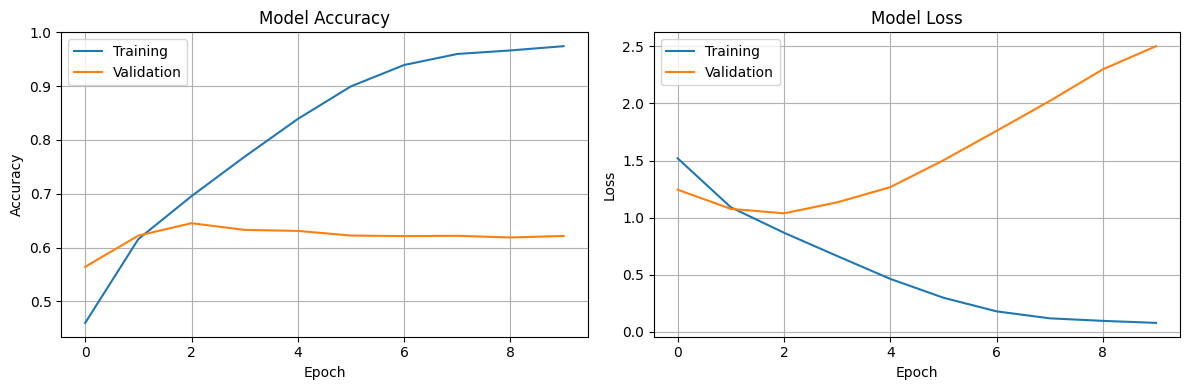

In [13]:
# After training, add this:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Initial Model Performance Issues**
The initial shallow CNN model demonstrated three critical problems:  
- Low accuracy (~60-70% on validation set)  
- High loss indicating poor prediction confidence  
- Overfitting - training accuracy significantly higher than validation accuracy, suggesting the model was memorizing rather than learning generalizable patterns

These results indicated that the model lacked sufficient capacity and architectural sophistication to capture the complexity of CIFAR-10 images. A fundamental redesign was necessary.

**Architectural Improvements: Rationale**
The new model incorporates several key design principles proven effective for image classification tasks:
1. Deeper Architecture with Convolutional Blocks  
**Block structure:** Conv → Conv → Pool → Dropout
- Rationale: Stacking two convolutional layers before pooling allows hierarchical feature learning  
First conv layer extracts basic features (edges, textures)  
Second conv layer combines these into more complex patterns (shapes, object parts)  
This approach is inspired by VGG architecture, which demonstrated that **depth improves performance more than wider filters**

2. Padding Strategy: padding='same'  
Conv2D(32, (3,3), activation='relu', padding='same')  
- Rationale: Preserves spatial dimensions throughout each block (32×32 → 32×32 instead of 32×32 → 30×30)  
Retains information from image borders, which often contains important context  
Enables deeper networks without prematurely losing spatial resolution  
Ensures consistent feature map sizes for better gradient flow

3. Progressive Filter Depth: 32 → 64 → 128  
Block 1: 32 filters  (low-level features)  
Block 2: 64 filters  (mid-level patterns)  
Block 3: 128 filters (high-level representations)  
- Rationale:  
Early layers need fewer filters to capture universal low-level features (edges, colors, basic textures)  
Deeper layers require more filters to represent increasingly complex and class-specific patterns  
Doubling filters after pooling is a standard practice that balances model capacity with computational efficiency  
Creates a feature pyramid: spatial dimensions decrease while feature depth increases

4. Strategic Dropout Regularization  
Dropout(0.25)  # After pooling layers  
Dropout(0.2)   # Before final classification  
- Rationale:  
Prevents overfitting by randomly deactivating 20-25% of neurons during training  
Forces the network to learn robust, redundant representations rather than memorizing training data  
Placed after pooling layers and in the classifier for maximum regularization effect  
Essential for CIFAR-10's relatively small dataset (50,000 training images)  

5. Controlled Spatial Downsampling
Conv → Conv → MaxPool (32×32 → 16×16)  
Conv → Conv → MaxPool (16×16 → 8×8)  
Conv → MaxPool (8×8 → 4×4)  
- Rationale:  
Extracts rich features at each spatial resolution before downsampling  
Prevents premature information loss that occurred in the shallow model  
Mimics the hierarchical processing of the human visual system  
Provides the network with sufficient computational budget at each scale

6. Increased Classifier Capacity  
Dense(128, activation='relu')  
- Rationale:  
After three pooling stages, the network produces 4×4×128 = 2,048 features  
A 128-unit dense layer provides sufficient capacity to integrate these features into class decisions  
Balances expressiveness with computational efficiency and overfitting risk  
- Design Philosophy: Feature Pyramid Architecture  
The model follows a "pyramid" structure where:  
Spatial dimensions shrink progressively (32×32 → 16×16 → 8×8 → 4×4)  
Feature depth grows systematically (3 channels → 32 → 64 → 128 filters)  
Information is compressed hierarchically from raw pixels to class-specific representations   

This design enables the network to:  
Capture low-level features at high resolution   
Build mid-level patterns at intermediate resolution  
Form high-level semantic concepts at low resolution  
Integrate all information for final classification

Expected Performance Improvements
This architecture addresses all three problems of the initial model:  
Higher accuracy through increased representational capacity and hierarchical feature learning  
Lower loss via better gradient flow from padding and systematic depth  
Reduced overfitting through dropout regularization and architectural inductive biases  
The combination of these design choices creates a robust CNN suitable for the complexity of CIFAR-10's 10-class image classification task.

In [14]:
model = Sequential([
    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Block 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=20,  # More epochs
    batch_size=32,
    validation_split=0.2
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2898 - loss: 1.9014 - val_accuracy: 0.5197 - val_loss: 1.3379
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5304 - loss: 1.2963 - val_accuracy: 0.6244 - val_loss: 1.0728
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6203 - loss: 1.0664 - val_accuracy: 0.6910 - val_loss: 0.8869
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6714 - loss: 0.9385 - val_accuracy: 0.7195 - val_loss: 0.8069
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7006 - loss: 0.8474 - val_accuracy: 0.7359 - val_loss: 0.7658
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7246 - loss: 0.7895 - val_accuracy: 0.7542 - val_loss: 0.7277
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7436 - loss: 0.7347 - val_accuracy: 0.7618 - val_loss: 0.7032
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7525 - loss: 0.7033 

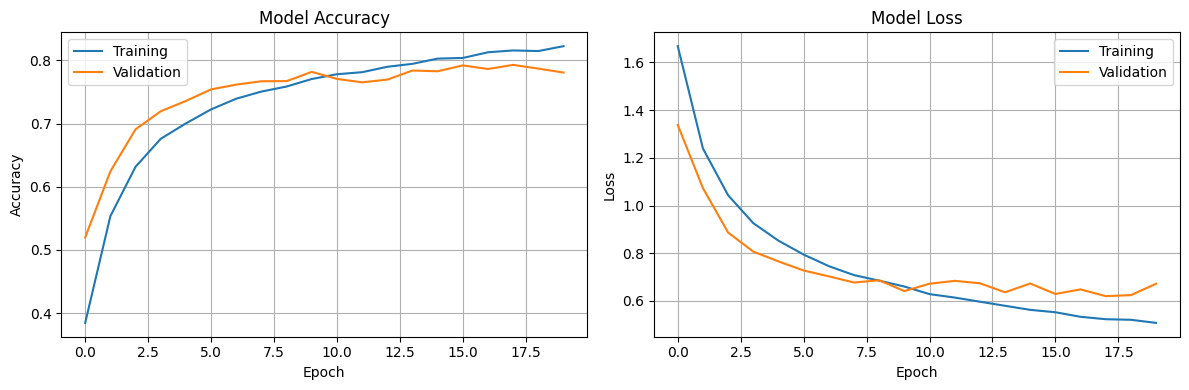

In [16]:
# After training, add this:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The model has improved significantly:  
Test accuracy: 0.7761
Test loss: 0.6784  
The graph shows that the model is still learning. Therefore we could improve the model hyperparameters:
- Epochs and batch size
- Learning rate
- Include one more block preserving the same architecture